In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from models import models_ddos

In [20]:
def loadDataset():
    # Put dataset path here ! 
    filename = 'pcap_data.csv'    

    trainfile = pd.read_csv(filename)    
    data = pd.DataFrame(trainfile).to_numpy()
    np.random.shuffle(data)
    
    X = data[:, :25]
    y = data[:, 25].astype('int32')  
 
    # MIN-MAX normalization
 
    xmin = X.min(axis=0)
    xmax = X.max(axis=0)
    X = (X-xmin)/(xmax-xmin)
    
    # Train data 80% | Test data 15% | Validation data 5%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, stratify=y_test)

    return X_train.astype('float32'), y_train.astype('int32'), \
           X_val.astype('float32'), y_val.astype('int32'), \
           X_test.astype('float32'), y_test.astype('int32')

In [21]:
nclass = 3

# -- LOAD DATA -----------------------------------------------------------------
X_train, y_trainn, X_val, y_valn, X_test, y_testn = loadDataset()
inshape = X_train.shape[1]

# to_categorical
y_train = to_categorical(y_trainn, nclass)
y_val = to_categorical(y_valn, nclass)
y_test = to_categorical(y_testn, nclass)

print('X_train.shape=', X_train.shape)
print('X_test.shape=',  X_test.shape)
print('X_val.shape=',  X_val.shape)

# -----------------------------------------------------------------------------
# print model to an image file
# dot_img_file = 'model1.png'
# plot_model(model, to_file=dot_img_file, show_shapes=True)

X_train.shape= (11973, 25)
X_test.shape= (2245, 25)
X_val.shape= (749, 25)


Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.5316 - loss: 1.0584 - val_acc: 0.7824 - val_loss: 0.7583
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7588 - loss: 0.7020 - val_acc: 0.8064 - val_loss: 0.5574
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8039 - loss: 0.5651 - val_acc: 0.8144 - val_loss: 0.5259
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8127 - loss: 0.5324 - val_acc: 0.8291 - val_loss: 0.4976
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8348 - loss: 0.5026 - val_acc: 0.8411 - val_loss: 0.4824
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8409 - loss: 0.4858 - val_acc: 0.8425 - val_loss: 0.4653
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8529 - loss: 0.4676 - val_acc: 0.8518 - val_loss: 0.4546
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.8550 - loss: 0.4585 - val_acc: 0.8585 - val_loss: 0.4407
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/

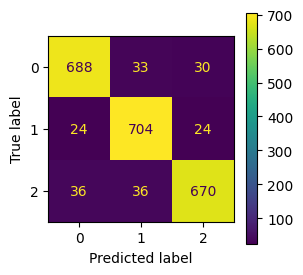

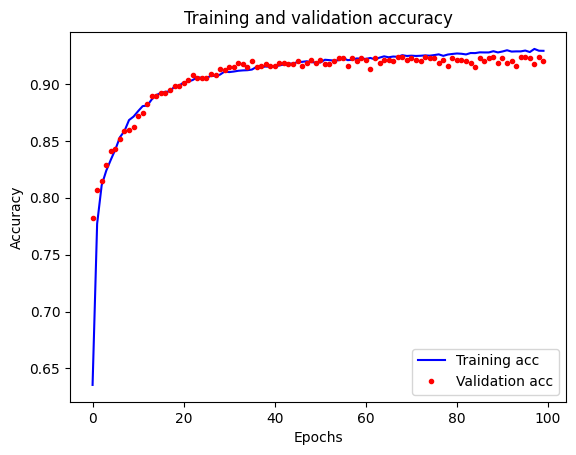

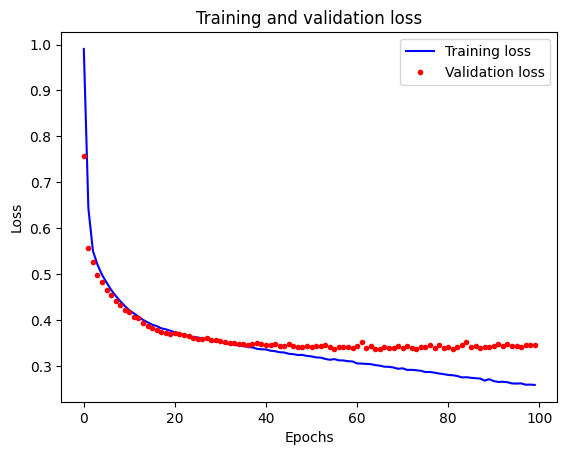

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - acc: 0.4940 - loss: 1.0716 - val_acc: 0.7170 - val_loss: 0.9239
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.7269 - loss: 0.8626 - val_acc: 0.7957 - val_loss: 0.6617
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7733 - loss: 0.6529 - val_acc: 0.8131 - val_loss: 0.5714
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.7933 - loss: 0.5742 - val_acc: 0.8198 - val_loss: 0.5429
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8111 - loss: 0.5431 - val_acc: 0.8264 - val_loss: 0.5244
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8204 - loss: 0.5305 - val_acc: 0.8371 - val_loss: 0.5041
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8181 - loss: 0.5264 - val_acc: 0.8411 - val_loss: 0.4879
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8407 - loss: 0.4869 - val_acc: 0.8505 - val_loss: 0.4721
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/

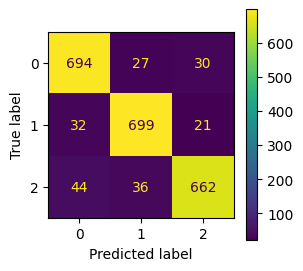

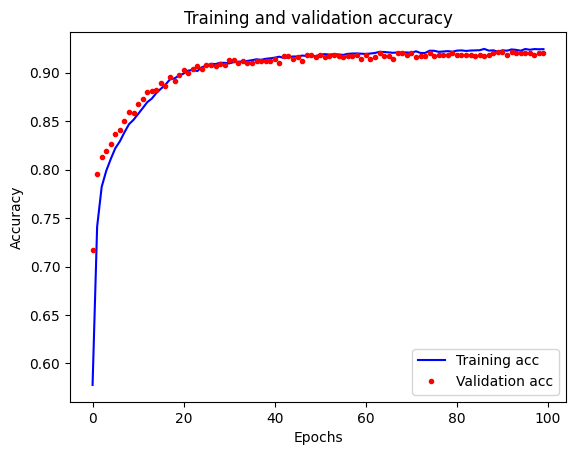

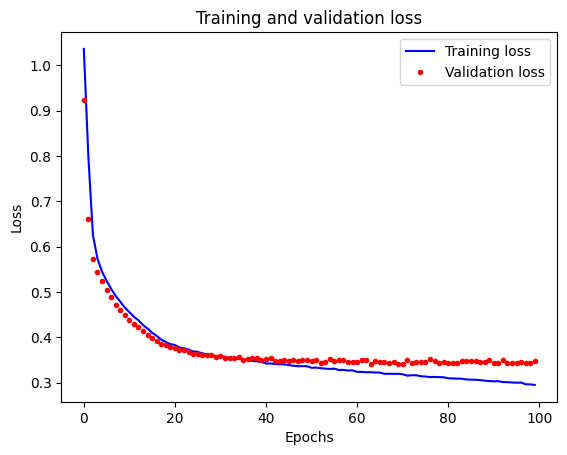

In [22]:
modelarr = []
inshape = X_train.shape[1]
batch_size = 64
lr = 1e-4
N = 64

modelarr.append(models_ddos.model_conv1D(lr=lr,N=N,inshape=inshape,nclass=nclass))
modelarr.append(models_ddos.model_dense(lr=lr,N=N,inshape=inshape,nclass=nclass))

for k in range(len(modelarr)):

    epochs = 100
    model = modelarr[k]
    model.summary

    # Class balancing weights
    class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                      classes=np.unique(y_trainn),
                                                      y=y_trainn)


    class_weights = {i: class_weights[i] for i in range(len(class_weights))}

    # -- CALLBACKS -----------------------------------------------------------------
    earlyStopping = EarlyStopping(monitor='val_loss',
                                  patience=30,
                                  verbose=0,
                                  mode='min')

    modelCheckPoint = ModelCheckpoint('./savemodels'+str(k)+'/model5class.weights.{epoch:03d}-{val_acc:.4f}.keras',
                                    save_best_only=True,
                                    monitor='val_acc',
                                    mode='max')

    history = model.fit(X_train, y_train,
                        shuffle=True,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=[modelCheckPoint],
                        class_weight=class_weights,
                        )

    # -- Load best model ----------------------------------------------------------
    str_models = os.listdir('./savemodels'+str(k))
    str_models = np.sort(str_models)
    best_model = str_models[str_models.size-1]
    print(f'best_model = {best_model}')
    model.load_weights('./savemodels'+str(k)+'/'+best_model)

    # --Confusion matrix ----------------------------------------------------------
    print('TEST DATA-Confusion matrix:')  
    pred = model.predict(X_test)
    y_pred = pred.argmax(axis=-1)

    cm = confusion_matrix(y_testn.astype('int32'), y_pred)
    acc = accuracy_score(y_testn.astype('int32'), y_pred)
    print(f'accuracy = {acc}')

    # -- Confusion matrix plot
    label = [0, 1, 2]

    cmo = ConfusionMatrixDisplay(cm, display_labels=label)
    fig, ax = plt.subplots(figsize=(3, 3))
    cmo.plot(ax=ax)

    # Plot training and validation accurry and loss graphs
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    np.save('historydata'+str(k)+'.npy',[acc,val_acc,loss,val_loss])
    [acc, val_acc, loss, val_loss] = np.load('historydata'+str(k)+'.npy')

    plt.figure()
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r.', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r.', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()